In [82]:
import numpy as np
from sklearn.datasets import make_regression as mr
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
X,y = mr(n_samples=100, n_features=1, n_informative=1, n_targets=1, bias=1.0, effective_rank=None, tail_strength=0.5, noise=1.0, shuffle=True, coef=False, random_state=None)

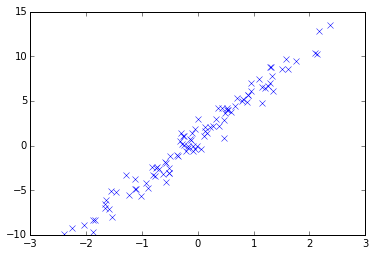

In [90]:
plt.plot(X,y,'x')


# Streaming Variance

In [91]:
def mu(x,x_old,N_old,S_old,t=1):
    "computes 1/n*sum(x*t)"
    x_new = x_old + (1/(N_old+1) *((x*t)-x_old))
    S = S_old +(x-x_new)*(x-x_new)
    n_new = N_old+1
    return x_new,n_new,S

In [107]:
y_t = 0
y_mean = 0
y_var = 0
n= 0
n_new = 0
y_hat = 0
S = 0
for i in range(len(y)):
    y_hat,n_new,S = mu(y[i],y_hat,n_new,S)

In [108]:
np.mean(y),np.var(y)

(0.83205474160271597, 28.482456251145109)

In [109]:
y_hat, S/(n_new-1)

(0.83205474160271631, 27.707194025564636)

# streaming regression

In [111]:
def regr(x,y,A,b):
    A = A+x*x
    b = b + x*y
    return A,b

In [112]:
A = 0
b = 0

for i in range(len(y)):
    A,b = regr(X[i],y[i],A,b)

In [113]:
beta = 1/A *b

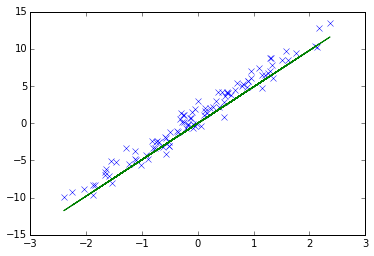

In [122]:
plt.plot(X,y,'x')
plt.plot(X,X*beta)